# Exploratory Data Analysis - Pilot Stocks


In this notebook, we are going to continue doing more exploratory data analysis but now with the merged file from three different datasets. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

stocks = pd.read_csv("/Users/maralinetorres/Documents/GitHub/Predicting-Environmental-and-Social-Actions/Sprint #5 - Midterm presentations/pilot_stocks.csv")
print(f'The pilot dataset has {stocks.shape[0]} rows and {stocks.shape[1]} columns')
stocks.head(3)

The pilot dataset has 780 rows and 25 columns


,Year,Ticker,Environmental Disclosure Score,GHG Scope 1,Total Energy Consumption,Change_in_EDS,Change_in_GHG,Change_in_TEC,Company,Total_Assets,...,ROA,Profit_Margin,Annual_Stock_Return,Ratio of GHG Emissions to Total Assets,Ratio of GHG Emissions to Total Sales,Ratio of Total Energy Consumption to Total Assets,Ratio of Total Energy Consumption to Total Sales,Profitable,Logarithm_Total_Assets,Logarithm_Total_Sales
0,2005,AEE,NaN,NaN,NaN,NaN,NaN,NaN,AMEREN CORP,18162.0,...,3.408215,9.129794,NaN,NaN,NaN,NaN,NaN,True,9.807087,8.821732
1,2006,AEE,NaN,NaN,NaN,NaN,NaN,NaN,AMEREN CORP,19578.0,...,2.850138,8.110465,NaN,NaN,NaN,NaN,NaN,True,9.882162,8.836374
2,2007,AEE,9.7,NaN,NaN,NaN,NaN,NaN,AMEREN CORP,20728.0,...,3.034543,8.335542,NaN,NaN,NaN,NaN,NaN,True,9.939241,8.928773


In [2]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               780 non-null    int64  
 1   Ticker                                             780 non-null    object 
 2   Environmental Disclosure Score                     636 non-null    float64
 3   GHG Scope 1                                        398 non-null    float64
 4   Total Energy Consumption                           243 non-null    float64
 5   Change_in_EDS                                      589 non-null    float64
 6   Change_in_GHG                                      377 non-null    float64
 7   Change_in_TEC                                      237 non-null    float64
 8   Company                                            780 non-null    object 
 9   Total_Asse

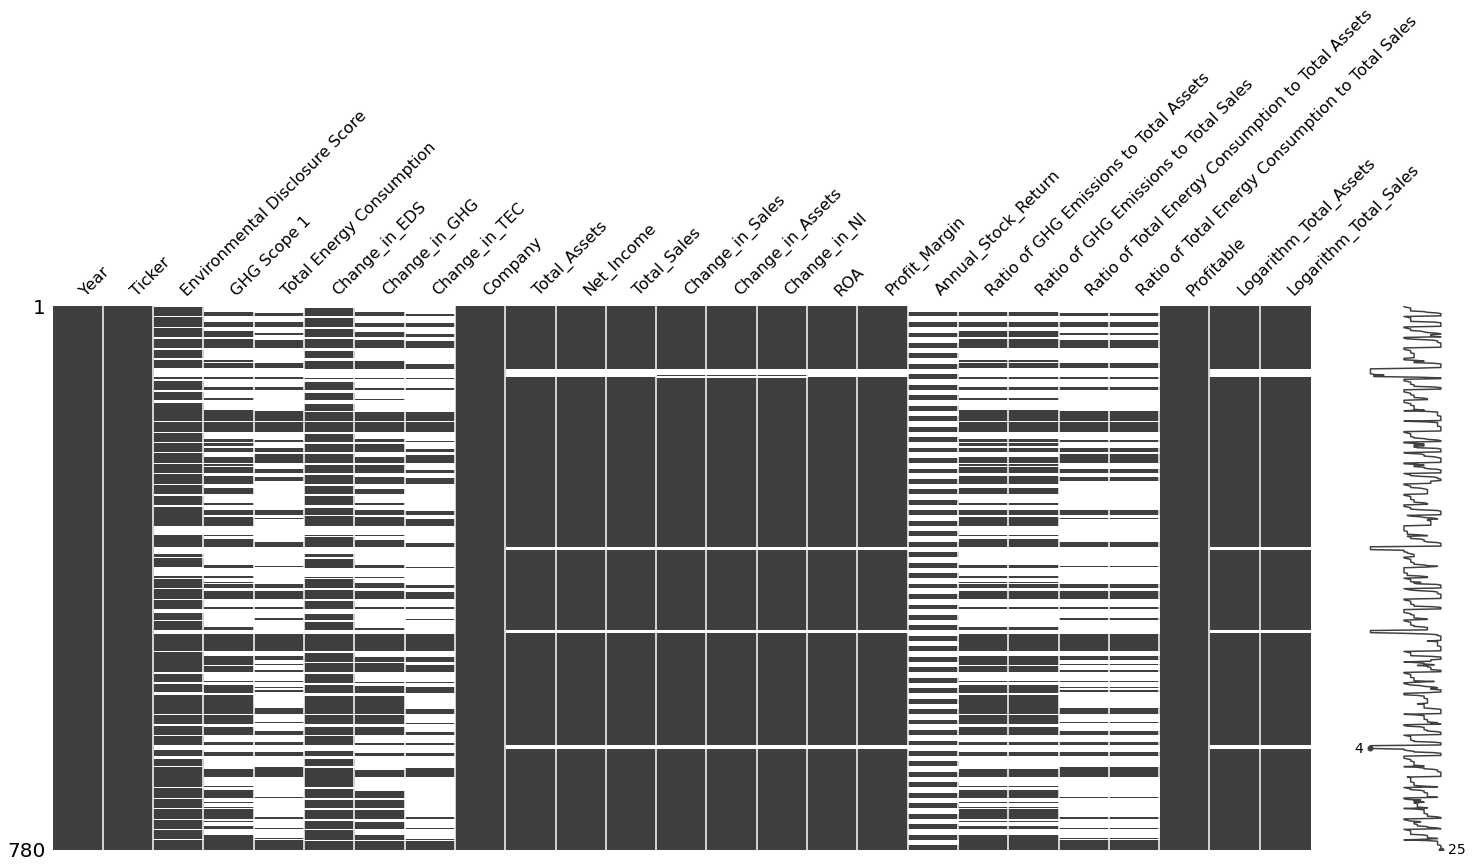

In [3]:
msno.matrix(stocks);

As mentioned in the data collection, the stock pilot dataset is missing values in multiple columns. The majority of the missing data comes from the Bloomberg environmental data. This is a big challenge because those variables are potentially good predictors for our model. 

In the next visualization, we present the number of years each company is missing the GHG Scope. These is our potential outcome variable, the value that we are interested to predict. 

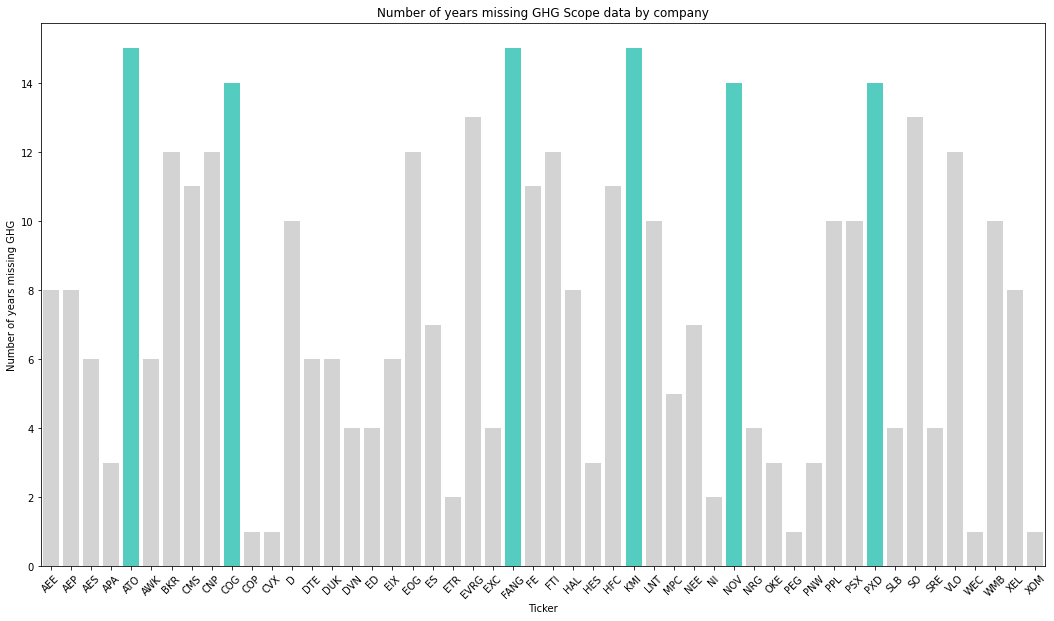

In [4]:
#Get companies that don't have GHG Scope
stock_missing_ghg = stocks.loc[stocks['GHG Scope 1'].isna(), ['Ticker','Year']].groupby('Ticker').count().reset_index()
top5 = stock_missing_ghg.sort_values(by='Year', ascending=False)[:5].Year.values.tolist()

def set_custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    pal = []
    
    for item in series:
        if item in top5:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

plt.figure(figsize=(18,10))
x = sns.barplot(x='Ticker', y='Year', data=stock_missing_ghg, palette=set_custom_palette(stock_missing_ghg['Year']));
x.set_title('Number of years missing GHG Scope data by company');
x.set_ylabel('Number of years missing GHG');
x.set_xlabel('Ticker');
x.set_xticklabels(x.get_xticklabels(), rotation=45);
x.figure.savefig('MissingGHG.png');

The visualization presents the number of years that each company is missing GHG Scope. 50 from 52 stocks are missing GHG values. Some are missing less than 6 years but it is not the case with the majority. The visualization highlights the top 5 companies missing the GHG Scope:

1) ATO
2) COG
3) FANG
4) KMI
5) NOV



In [5]:
stock_missing_YH = stocks.loc[stocks['Annual_Stock_Return'].isna(), ['Ticker','Year']].groupby('Ticker').count().reset_index()
stock_missing_YH.describe()

,Year
count,52.0
mean,8.0
std,0.0
min,8.0
25%,8.0
50%,8.0
75%,8.0
max,8.0


We were also interested to know how many companies were missing the data for the Annual Stock Return which was collected using the Yahoo API. As presented, the 52 companies are missing data for 8 years (From 2005 to 2012). 

In [6]:
stocks.loc[stocks['Annual_Stock_Return'].isna(),].groupby(['Year'])['Annual_Stock_Return'].count().reset_index()

,Year,Annual_Stock_Return
0,2005,0
1,2006,0
2,2007,0
3,2008,0
4,2009,0
5,2010,0
6,2011,0
7,2012,0


In [7]:
stocks.loc[stocks.Total_Assets.isna(),['Company','Year']]

,Company,Year
90,BAKER HUGHES CO,2005
91,BAKER HUGHES CO,2006
92,BAKER HUGHES CO,2007
93,BAKER HUGHES CO,2008
94,BAKER HUGHES CO,2009
95,BAKER HUGHES CO,2010
96,BAKER HUGHES CO,2011
97,BAKER HUGHES CO,2012
98,BAKER HUGHES CO,2013
99,BAKER HUGHES CO,2014


We also calculated the average profit margin for each company. As we might know, the profit margin indicates how many dollars of profit the business has generated for each dollar of sale. As the visualization presents, four companies are operating with a negative profit margin:

1) APA
2) FANG
3) HES
3) MRO


The other 48 companies have a positive average profit margin throught out the 24 years (2005 to 2019). Moreover, NEE presented the hightest average profit margin around 15%. 

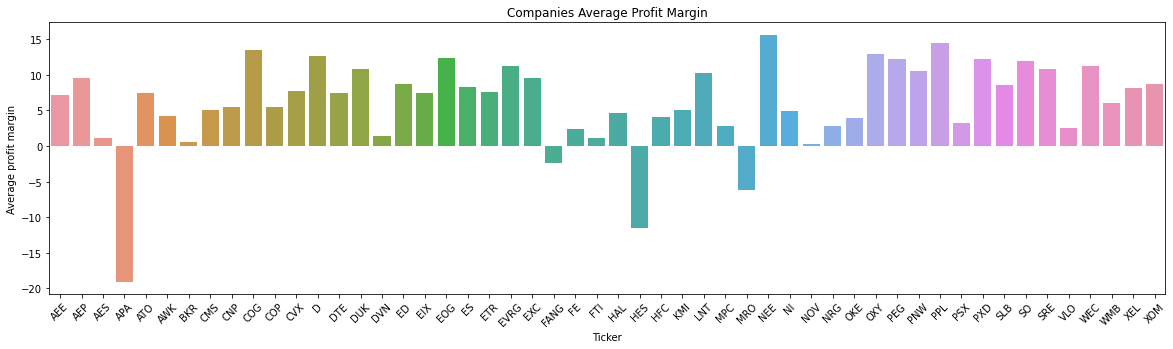

In [8]:
profit_margin_mean = stocks.groupby('Ticker')[['Profit_Margin']].mean().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x="Ticker", y="Profit_Margin", data=profit_margin_mean);
plt.xticks(rotation=45);
plt.title('Companies Average Profit Margin');
plt.ylabel('Average profit margin');

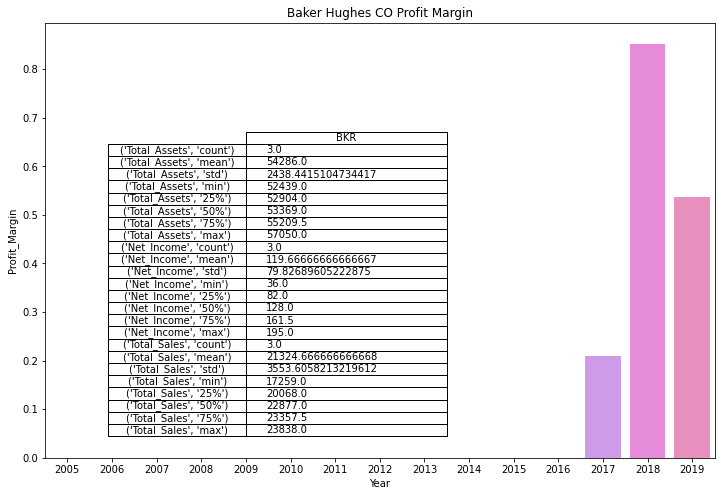

In [9]:
plt.figure(figsize=(12,8))
bkr = stocks.loc[stocks.Ticker == 'BKR', :]
bkr['Year'] = pd.to_datetime(bkr.Year, format='%Y')
bkr['Year'] = bkr.Year.dt.year
x = bkr.groupby('Ticker')[['Total_Assets','Net_Income','Total_Sales']].describe().T
sns.barplot(x='Year',y='Profit_Margin', data = bkr);
plt.table(cellText=x.values,
          rowLabels=x.index,
          colLabels=x.columns,
          cellLoc = 'left', rowLoc = 'center',
          loc='left', bbox=[.30,.05,.3,.7]);
plt.title('Baker Hughes CO Profit Margin');

Text(0.5, 1.0, 'Number of profitable companies by year')

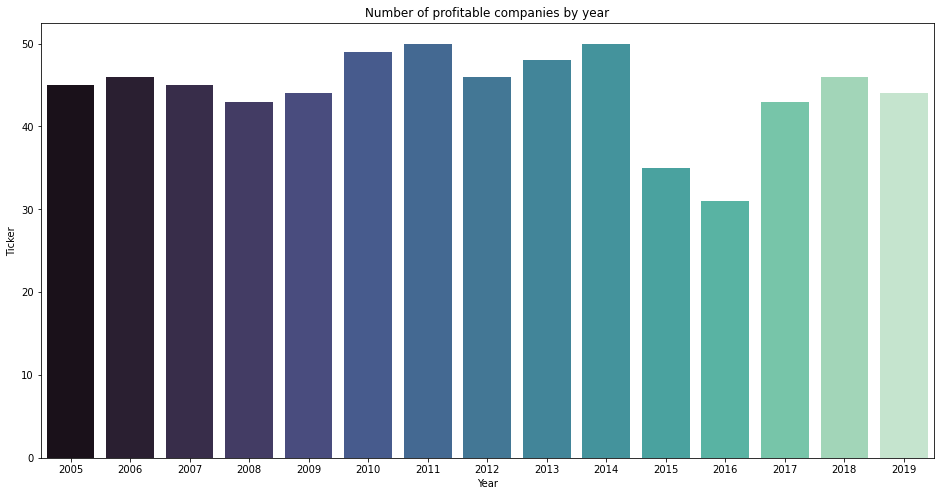

In [10]:
plt.figure(figsize=(16,8))
profitable = stocks[stocks.Profitable == True].groupby('Year')[['Ticker']].count().reset_index()

sns.barplot(x='Year', y='Ticker', data=profitable, palette='mako')
plt.title('Number of profitable companies by year')

In [11]:
stocks.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,780.0,2.012000e+03,4.323266,2005.000000,2008.000000,2012.000000,2016.000000,2.019000e+03
Environmental Disclosure Score,636.0,3.146965e+01,18.263954,1.400000,15.900000,31.750000,45.500000,8.430000e+01
GHG Scope 1,398.0,2.830835e+04,32606.231283,52.500000,5225.000000,15042.650000,36650.000000,1.455000e+05
Total Energy Consumption,243.0,1.384910e+05,308233.410807,101.500000,10630.400000,60000.000000,191643.500000,3.773309e+06
Change_in_EDS,589.0,2.528543e+01,105.813056,-65.363128,0.000000,2.725724,19.090909,1.887500e+03
Change_in_GHG,377.0,-6.600340e-01,26.811189,-87.928545,-8.586678,-1.145510,3.606484,2.408636e+02
Change_in_TEC,237.0,1.221439e+02,1228.707439,-98.965689,-8.361044,0.000000,3.196347,1.575025e+04
Total_Assets,754.0,4.400614e+04,52446.876654,172.517000,17640.800500,30182.100000,47309.500000,3.625970e+05
Net_Income,754.0,1.862769e+03,5374.043089,-23119.000000,306.810750,827.396500,1830.750000,4.522000e+04
Total_Sales,754.0,2.729778e+04,56598.313351,27.253000,6639.350000,11485.987500,16794.000000,4.335260e+05


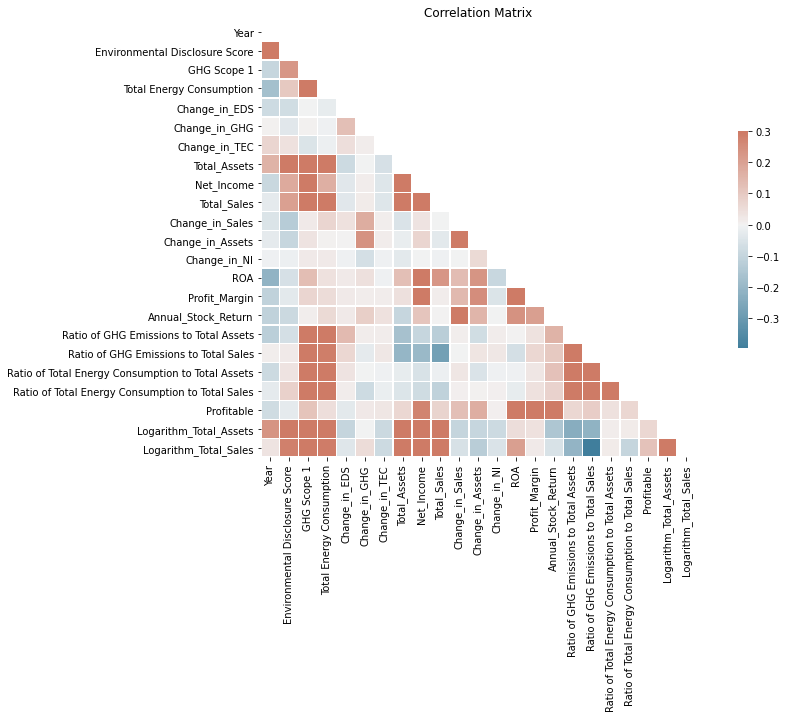

In [31]:
corr = stocks.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlation Matrix')
plt.savefig('correlation_matrix.png', facecolor='white', edgecolor='none', bbox_inches = 'tight')

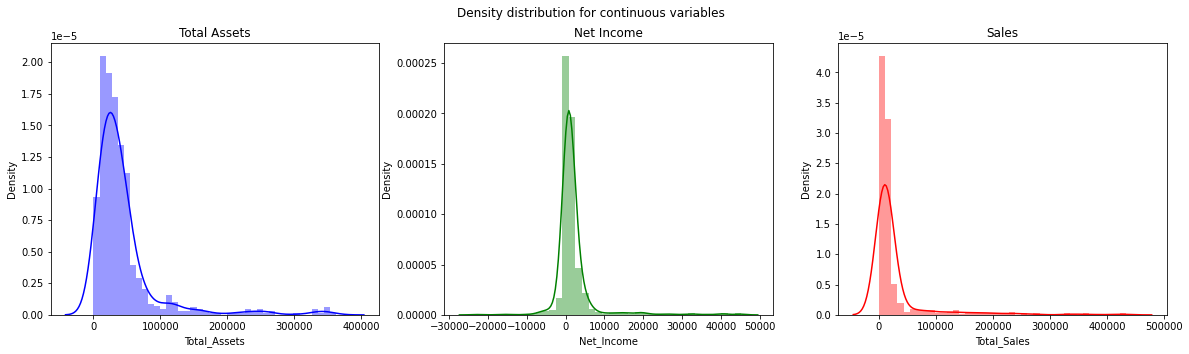

In [37]:
fig, axs = plt.subplots(1,3, figsize=(20,5));
fig.suptitle('Density distribution for continuous variables');
sns.distplot(stocks['Total_Assets'], ax=axs[0], color='b', bins = 40);
axs[0].set_title('Total Assets');
sns.distplot(stocks.Net_Income, ax=axs[1], color='g', bins = 40);
axs[1].set_title('Net Income');
sns.distplot(stocks.Total_Sales, ax=axs[2], color='r', bins = 40);
axs[2].set_title('Sales');
plt.savefig('density_distribution.png', facecolor='white', edgecolor='none', bbox_inches = 'tight')